In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from matplotlib.colors import ListedColormap
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
%matplotlib inline

Loading the data

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
df.shape

(11054, 32)

In [4]:
df['class'] = (df['class']==1).astype(int)
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,0
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,0
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


Exploring the data

In [5]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [6]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [7]:
df.drop('Index', axis=1, inplace = True)
df.head(3)

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0


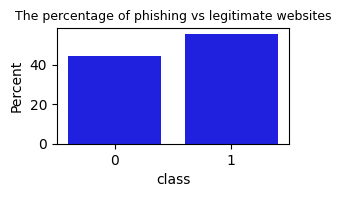

In [8]:
plt.figure(figsize = (3,1.5))
ax = sns.barplot(x = 'class', y='class', data = df, estimator = lambda x:len(x)/len(df)*100, color = 'Blue')
ax.set(ylabel="Percent")
ax.set_title('The percentage of phishing vs legitimate websites',size=9)
plt.show()

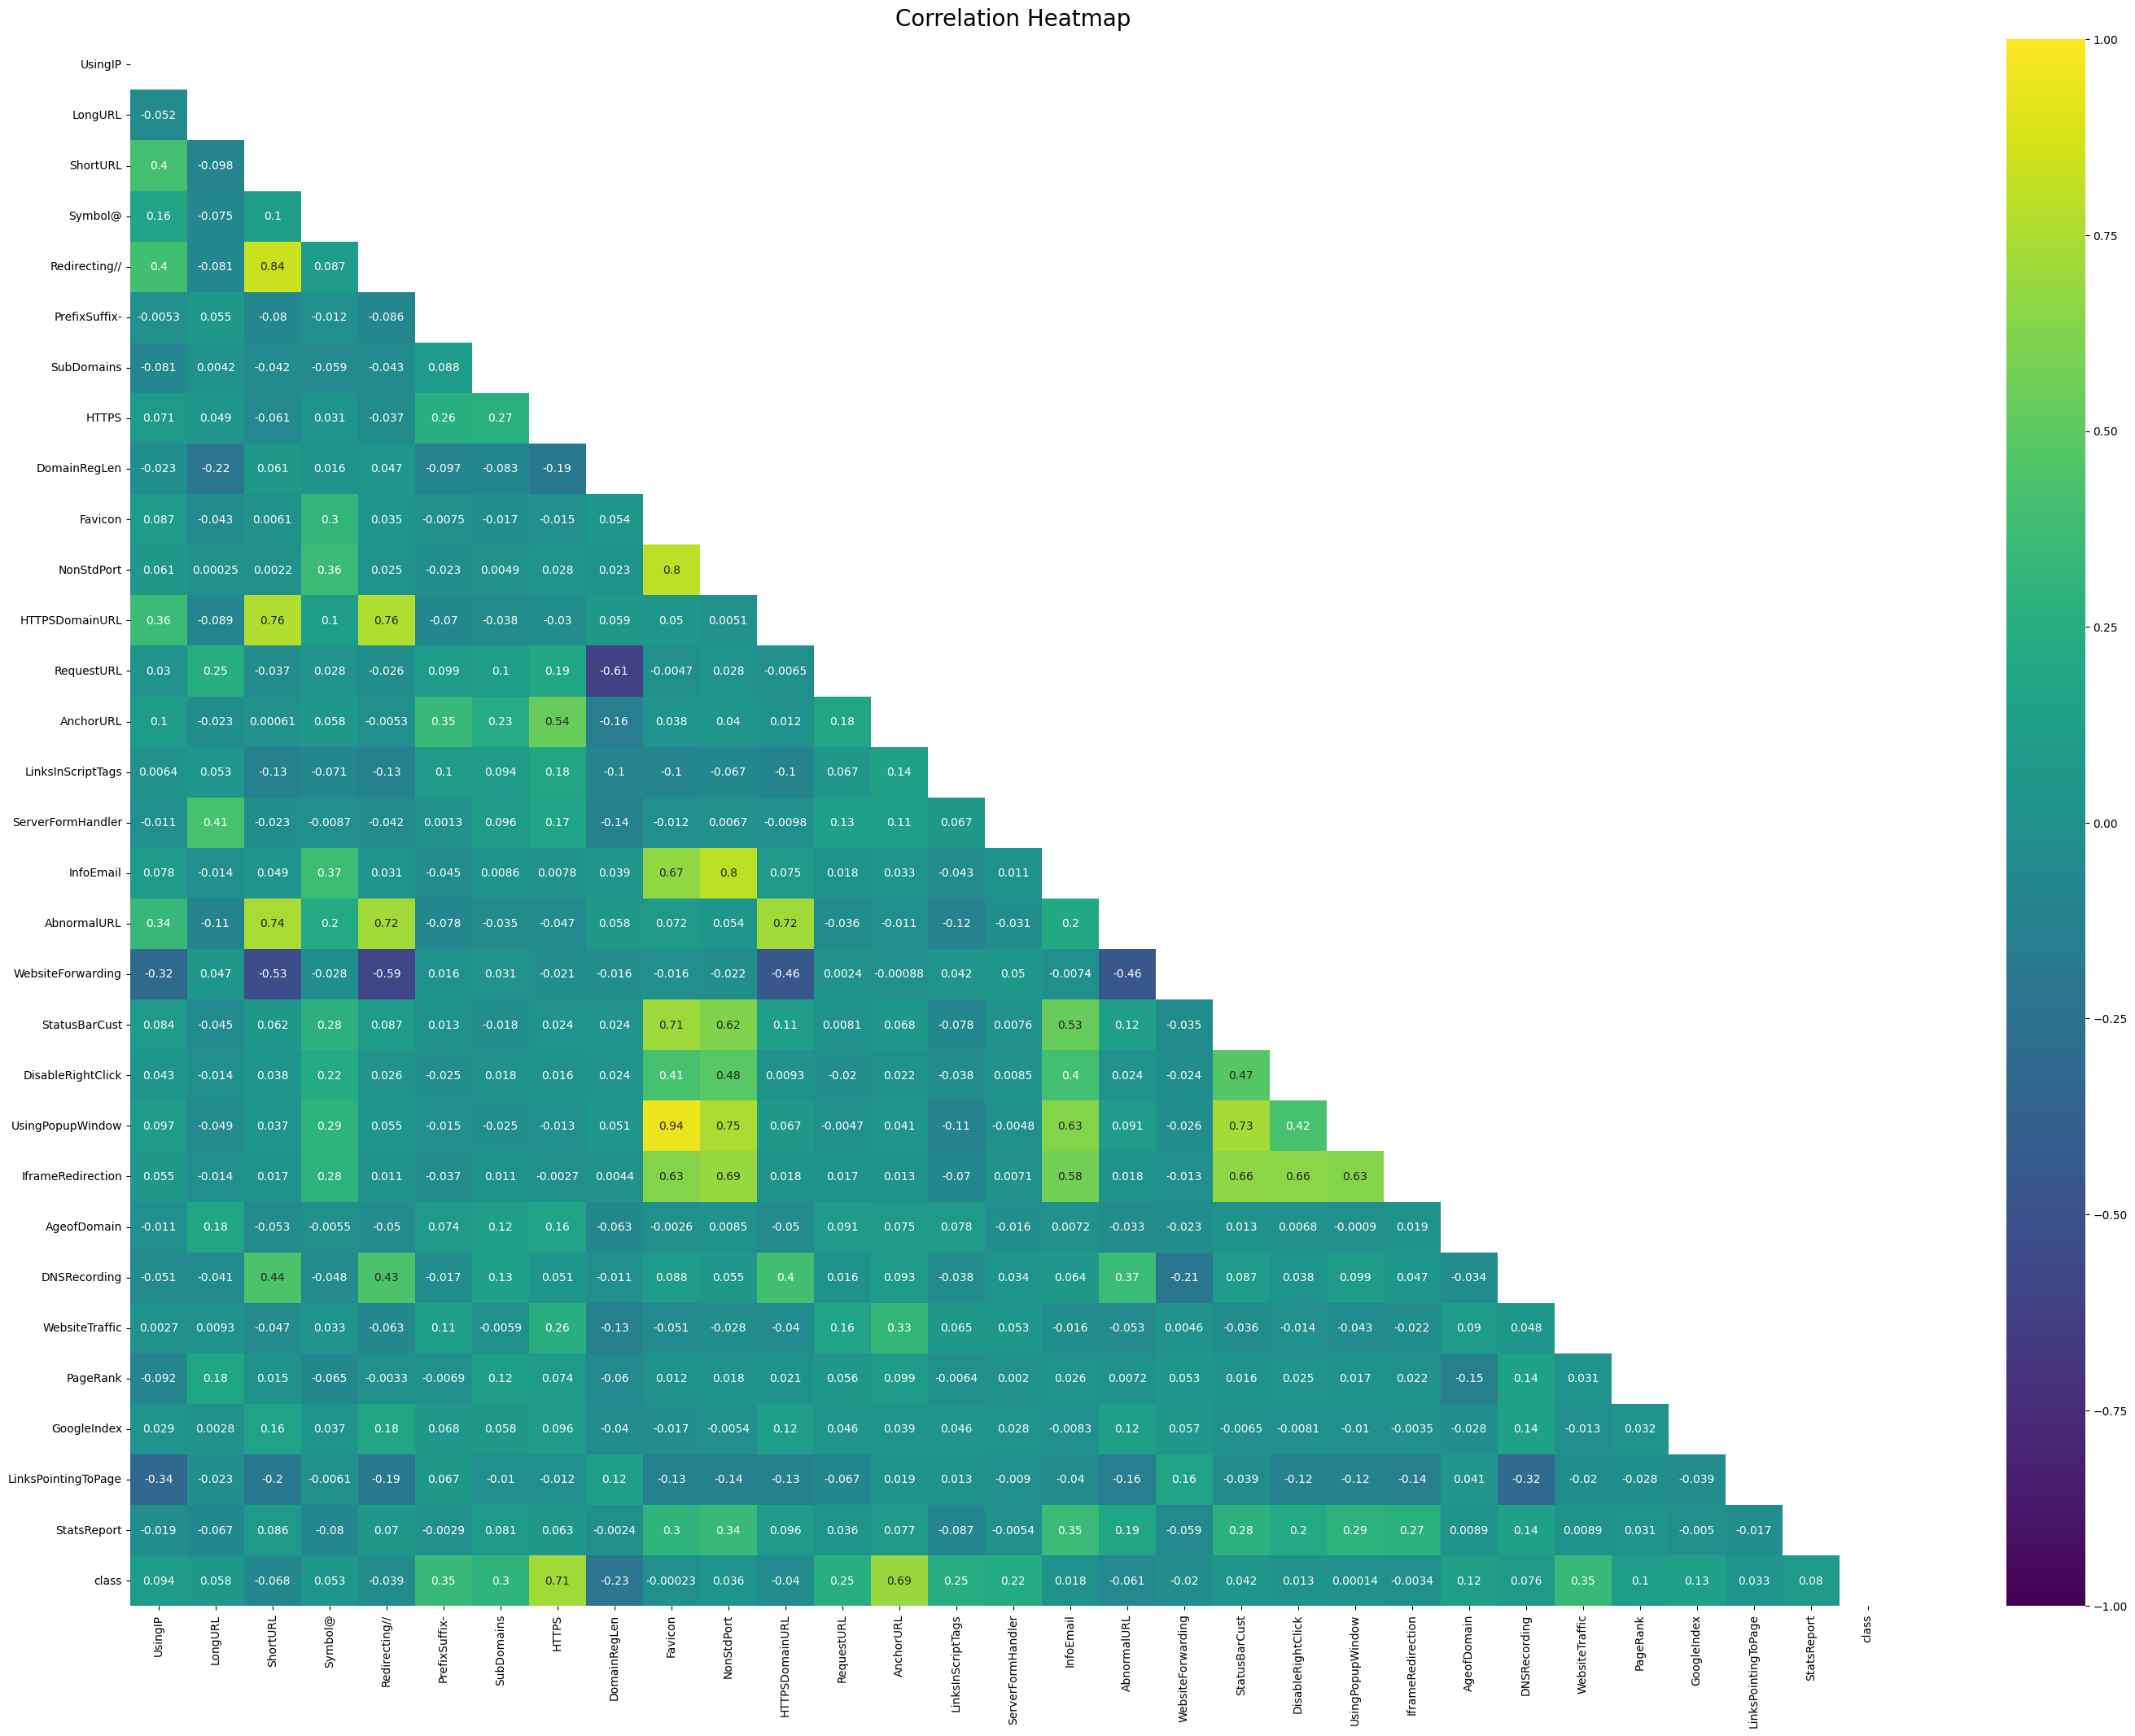

In [ ]:
plt.figure(figsize = (35,25))
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(df.corr(), dtype= bool))
heatmap = sns.heatmap(corr,mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', {'fontsize':20}, pad = 12)
plt.show()

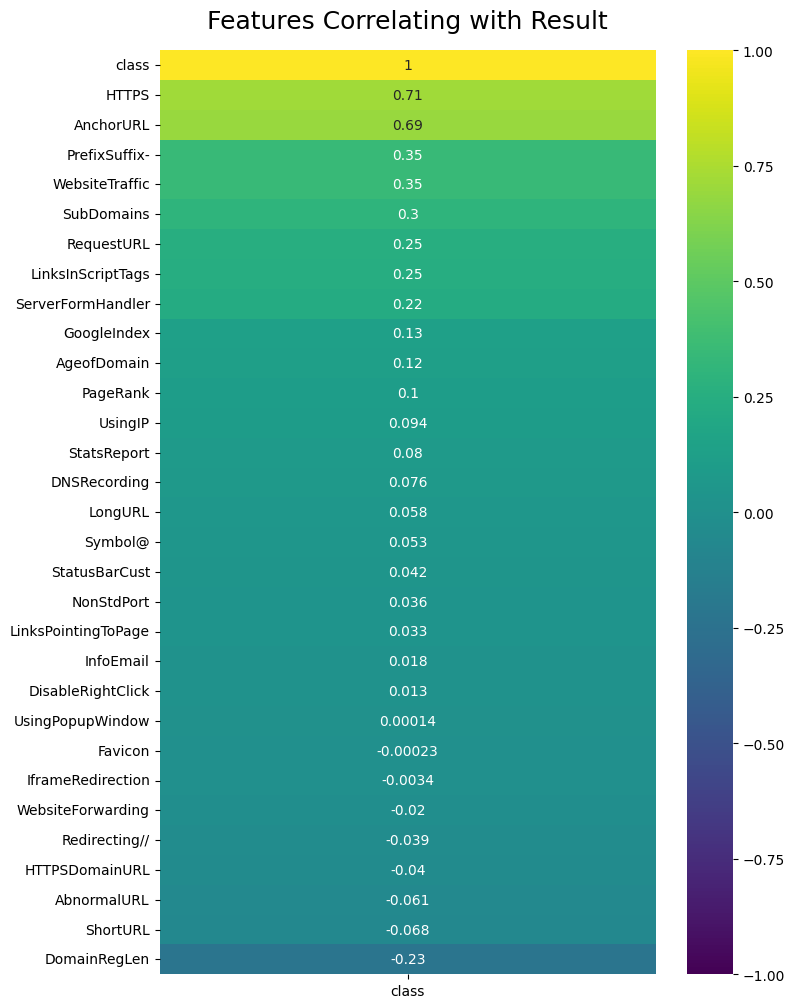

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.show()

Model Building

In [12]:
x = df.drop('class', axis = 1)
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [13]:
random_state = 42

classifiers = [LogisticRegression(random_state = random_state),
              KNeighborsClassifier(),
              SVC(random_state = random_state),
              DecisionTreeClassifier(random_state = random_state),
              RandomForestClassifier(random_state = random_state),
              AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1),
              GradientBoostingClassifier(random_state = random_state)]

for cls in classifiers:
    cls.fit(x_train, y_train)

pipe_dict = {0:"LogisticRegression",
            1:"KNeighborsClassifier",
            2:"SVC",
            3:"DecisionTreeClassifier",
            4:"RandomForestClassifier",
            5:"AdaBoostClassifier",
            6:"GradientBoostingClassifier"}    

In [14]:
#crossvalidation

for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, x_train, y_train, scoring = 'f1', cv=10)
    print("%s: %f" % (pipe_dict[i], cv_score.mean()))

LogisticRegression: 0.935445
KNeighborsClassifier: 0.941092
SVC: 0.952317
DecisionTreeClassifier: 0.962137
RandomForestClassifier: 0.974143
AdaBoostClassifier: 0.969293
GradientBoostingClassifier: 0.954691


Model Evaluation

In [15]:
# lists of various scores
precision =[]
recall =[]
f1_scores = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(x_train)
    pred_test = i.predict(x_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
  
    
    precision.append(prec)
    recall.append(recal)
    f1_scores.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [16]:

data = {'Precision':precision,
'Recall':recall,
'F1score':f1_scores,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}

Results = pd.DataFrame(data, index =["LogisticRegression",
            "KNeighborsClassifier",
            "SVC",
            "DecisionTreeClassifier",
            "RandomForestClassifier",
            "AdaBoostClassifier",
            "GradientBoostingClassifier"])

In [17]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
LogisticRegression,0.923680,0.948980,0.936159,0.948749,0.953858
KNeighborsClassifier,0.939989,0.950591,0.945260,0.948749,0.953858
SVC,0.936755,0.970462,0.953310,0.948749,0.953858
DecisionTreeClassifier,0.961108,0.968851,0.964964,0.948749,0.953858
RandomForestClassifier,0.965590,0.979592,0.972541,0.948749,0.953858
AdaBoostClassifier,0.961538,0.980129,0.970745,0.948749,0.953858
GradientBoostingClassifier,0.945732,0.964017,0.954787,0.948749,0.953858


Hard Voting Classifier

Lr = LogisticRegression(random_state = random_state),
Knn = KNeighborsClassifier(),
Svm = SVC(random_state = random_state),
Dt =  DecisionTreeClassifier(random_state = random_state),
Rfc =  RandomForestClassifier(random_state = random_state),
Ada =  AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1),
Gbc =  GradientBoostingClassifier(random_state = random_state)

Classifier = VotingClassifier(estimators = [('lr', Lr),('knn',Knn),('svm',Svm),('dt',Dt),('rfc',Rfc),('ada',Ada),('gbc',Gbc)], voting = 'hard')
Classifier.fit(x_train, y_train)

In [18]:
random_state = 42 

Lr = LogisticRegression(random_state=random_state)
Knn = KNeighborsClassifier()
Svm = SVC(random_state=random_state)
Dt = DecisionTreeClassifier(random_state=random_state)
Rfc = RandomForestClassifier(random_state=random_state)
Ada = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1)
Gbc = GradientBoostingClassifier(random_state=random_state)

Classifier = VotingClassifier(estimators=[
    ('lr', Lr),
    ('knn', Knn),
    ('svm', Svm),
    ('dt', Dt),
    ('rfc', Rfc),
    ('ada', Ada),
    ('gbc', Gbc)
], voting='hard')

Classifier.fit(x_train, y_train)

,estimators,"[('lr', ...), ('knn', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [19]:
predictions = Classifier.predict(x_test)
print("f1 score:",f1_score(y_test,predictions,average='weighted'))
print("Accuracy: ",100.0 *accuracy_score(y_test,predictions))
print("Matthews correlation coefficient:",matthews_corrcoef(y_test,predictions))

f1 score: 0.9637788629923277
Accuracy:  96.38227313837805
Matthews correlation coefficient: 0.926530528391676


Soft Voting Classifier

In [20]:
random_state = 42 

Lr = LogisticRegression(random_state=random_state)
Knn = KNeighborsClassifier()
Svm = SVC(random_state=random_state, probability = True)
Dt = DecisionTreeClassifier(random_state=random_state)
Rfc = RandomForestClassifier(random_state=random_state)
Ada = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1)
Gbc = GradientBoostingClassifier(random_state=random_state)

Classifier = VotingClassifier(estimators=[
    ('lr', Lr),
    ('knn', Knn),
    ('svm', Svm),
    ('dt', Dt),
    ('rfc', Rfc),
    ('ada', Ada),
    ('gbc', Gbc)
], voting='soft')

Classifier.fit(x_train, y_train)

,estimators,"[('lr', ...), ('knn', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [21]:
predictions = Classifier.predict(x_test)
print("f1 score:",f1_score(y_test,predictions,average='weighted'))
print("Accuracy: ",100.0 *accuracy_score(y_test,predictions))
print("Matthews correlation coefficient:",matthews_corrcoef(y_test,predictions))

f1 score: 0.9637850722353679
Accuracy:  96.38227313837805
Matthews correlation coefficient: 0.9265135497397814


Making feature vector for URL

In [26]:
pip install googlesearch-python

Note: you may need to restart the kernel to use updated packages.


In [28]:
import ipaddress
import re
import urllib.request
from bs4 import BeautifulSoup
import socket
import requests
import whois
from datetime import date, datetime
import time
from dateutil.parser import parse as date_parse
from urllib.parse import urlparse

from googlesearch import search

In [29]:
class FeatureExtraction:
    features = []
    def __init__(self,url):
        self.features = []
        self.url = url
        self.domain = ""
        self.whois_response = ""
        self.urlparse = ""
        self.response = ""
        self.soup = ""

        try:
            self.response = requests.get(url)
            self.soup = BeautifulSoup(response.text, 'html.parser')
        except:
            pass

        try:
            self.urlparse = urlparse(url)
            self.domain = self.urlparse.netloc
        except:
            pass

        try:
            self.whois_response = whois.whois(self.domain)
        except:
            pass


        

        self.features.append(self.UsingIp())
        self.features.append(self.longUrl())
        self.features.append(self.shortUrl())
        self.features.append(self.symbol())
        self.features.append(self.redirecting())
        self.features.append(self.prefixSuffix())
        self.features.append(self.SubDomains())
        self.features.append(self.Hppts())
        self.features.append(self.DomainRegLen())
        self.features.append(self.Favicon())
        

        self.features.append(self.NonStdPort())
        self.features.append(self.HTTPSDomainURL())
        self.features.append(self.RequestURL())
        self.features.append(self.AnchorURL())
        self.features.append(self.LinksInScriptTags())
        self.features.append(self.ServerFormHandler())
        self.features.append(self.InfoEmail())
        self.features.append(self.AbnormalURL())
        self.features.append(self.WebsiteForwarding())
        self.features.append(self.StatusBarCust())

        self.features.append(self.DisableRightClick())
        self.features.append(self.UsingPopupWindow())
        self.features.append(self.IframeRedirection())
        self.features.append(self.AgeofDomain())
        self.features.append(self.DNSRecording())
        self.features.append(self.WebsiteTraffic())
        self.features.append(self.PageRank())
        self.features.append(self.GoogleIndex())
        self.features.append(self.LinksPointingToPage())
        self.features.append(self.StatsReport())


     # 1.UsingIp
    def UsingIp(self):
        try:
            ipaddress.ip_address(self.url)
            return -1
        except:
            return 1

    # 2.longUrl
    def longUrl(self):
        if len(self.url) < 54:
            return 1
        if len(self.url) >= 54 and len(self.url) <= 75:
            return 0
        return -1

    # 3.shortUrl
    def shortUrl(self):
        match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net', self.url)
        if match:
            return -1
        return 1

    # 4.Symbol@
    def symbol(self):
        if re.findall("@",self.url):
            return -1
        return 1
    
    # 5.Redirecting//
    def redirecting(self):
        if self.url.rfind('//')>6:
            return -1
        return 1
    
    # 6.prefixSuffix
    def prefixSuffix(self):
        try:
            match = re.findall('\-', self.domain)
            if match:
                return -1
            return 1
        except:
            return -1
    
    # 7.SubDomains
    def SubDomains(self):
        dot_count = len(re.findall("\.", self.url))
        if dot_count == 1:
            return 1
        elif dot_count == 2:
            return 0
        return -1

    # 8.HTTPS
    def Hppts(self):
        try:
            https = self.urlparse.scheme
            if 'https' in https:
                return 1
            return -1
        except:
            return 1

    # 9.DomainRegLen
    def DomainRegLen(self):
        try:
            expiration_date = self.whois_response.expiration_date
            creation_date = self.whois_response.creation_date
            try:
                if(len(expiration_date)):
                    expiration_date = expiration_date[0]
            except:
                pass
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            age = (expiration_date.year-creation_date.year)*12+ (expiration_date.month-creation_date.month)
            if age >=12:
                return 1
            return -1
        except:
            return -1

    # 10. Favicon
    def Favicon(self):
        try:
            for head in self.soup.find_all('head'):
                for head.link in self.soup.find_all('link', href=True):
                    dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
                    if self.url in head.link['href'] or len(dots) == 1 or domain in head.link['href']:
                        return 1
            return -1
        except:
            return -1

    # 11. NonStdPort
    def NonStdPort(self):
        try:
            port = self.domain.split(":")
            if len(port)>1:
                return -1
            return 1
        except:
            return -1

    # 12. HTTPSDomainURL
    def HTTPSDomainURL(self):
        try:
            if 'https' in self.domain:
                return -1
            return 1
        except:
            return -1
    
    # 13. RequestURL
    def RequestURL(self):
        try:
            for img in self.soup.find_all('img', src=True):
                dots = [x.start(0) for x in re.finditer('\.', img['src'])]
                if self.url in img['src'] or self.domain in img['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for audio in self.soup.find_all('audio', src=True):
                dots = [x.start(0) for x in re.finditer('\.', audio['src'])]
                if self.url in audio['src'] or self.domain in audio['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for embed in self.soup.find_all('embed', src=True):
                dots = [x.start(0) for x in re.finditer('\.', embed['src'])]
                if self.url in embed['src'] or self.domain in embed['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for iframe in self.soup.find_all('iframe', src=True):
                dots = [x.start(0) for x in re.finditer('\.', iframe['src'])]
                if self.url in iframe['src'] or self.domain in iframe['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success/float(i) * 100
                if percentage < 22.0:
                    return 1
                elif((percentage >= 22.0) and (percentage < 61.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1
    
    # 14. AnchorURL
    def AnchorURL(self):
        try:
            i,unsafe = 0,0
            for a in self.soup.find_all('a', href=True):
                if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (url in a['href'] or self.domain in a['href']):
                    unsafe = unsafe + 1
                i = i + 1

            try:
                percentage = unsafe / float(i) * 100
                if percentage < 31.0:
                    return 1
                elif ((percentage >= 31.0) and (percentage < 67.0)):
                    return 0
                else:
                    return -1
            except:
                return -1

        except:
            return -1

    # 15. LinksInScriptTags
    def LinksInScriptTags(self):
        try:
            i,success = 0,0
        
            for link in self.soup.find_all('link', href=True):
                dots = [x.start(0) for x in re.finditer('\.', link['href'])]
                if self.url in link['href'] or self.domain in link['href'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for script in self.soup.find_all('script', src=True):
                dots = [x.start(0) for x in re.finditer('\.', script['src'])]
                if self.url in script['src'] or self.domain in script['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success / float(i) * 100
                if percentage < 17.0:
                    return 1
                elif((percentage >= 17.0) and (percentage < 81.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1

    # 16. ServerFormHandler
    def ServerFormHandler(self):
        try:
            if len(self.soup.find_all('form', action=True))==0:
                return 1
            else :
                for form in self.soup.find_all('form', action=True):
                    if form['action'] == "" or form['action'] == "about:blank":
                        return -1
                    elif self.url not in form['action'] and self.domain not in form['action']:
                        return 0
                    else:
                        return 1
        except:
            return -1

    # 17. InfoEmail
    def InfoEmail(self):
        try:
            if re.findall(r"[mail\(\)|mailto:?]", self.soap):
                return -1
            else:
                return 1
        except:
            return -1

    # 18. AbnormalURL
    def AbnormalURL(self):
        try:
            if self.response.text == self.whois_response:
                return 1
            else:
                return -1
        except:
            return -1

    # 19. WebsiteForwarding
    def WebsiteForwarding(self):
        try:
            if len(self.response.history) <= 1:
                return 1
            elif len(self.response.history) <= 4:
                return 0
            else:
                return -1
        except:
             return -1

    # 20. StatusBarCust
    def StatusBarCust(self):
        try:
            if re.findall("<script>.+onmouseover.+</script>", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 21. DisableRightClick
    def DisableRightClick(self):
        try:
            if re.findall(r"event.button ?== ?2", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 22. UsingPopupWindow
    def UsingPopupWindow(self):
        try:
            if re.findall(r"alert\(", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 23. IframeRedirection
    def IframeRedirection(self):
        try:
            if re.findall(r"[<iframe>|<frameBorder>]", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 24. AgeofDomain
    def AgeofDomain(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 25. DNSRecording    
    def DNSRecording(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 26. WebsiteTraffic   
    def WebsiteTraffic(self):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
            if (int(rank) < 100000):
                return 1
            return 0
        except :
            return -1

    # 27. PageRank
    def PageRank(self):
        try:
            prank_checker_response = requests.post("https://www.checkpagerank.net/index.php", {"name": self.domain})

            global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
            if global_rank > 0 and global_rank < 100000:
                return 1
            return -1
        except:
            return -1
            

    # 28. GoogleIndex
    def GoogleIndex(self):
        try:
            site = search(self.url, 5)
            if site:
                return 1
            else:
                return -1
        except:
            return 1

    # 29. LinksPointingToPage
    def LinksPointingToPage(self):
        try:
            number_of_links = len(re.findall(r"<a href=", self.response.text))
            if number_of_links == 0:
                return 1
            elif number_of_links <= 2:
                return 0
            else:
                return -1
        except:
            return -1

    # 30. StatsReport
    def StatsReport(self):
        try:
            url_match = re.search(
        'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', url)
            ip_address = socket.gethostbyname(self.domain)
            ip_match = re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
                                '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
                                '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
                                '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
                                '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
                                '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42', ip_address)
            if url_match:
                return -1
            elif ip_match:
                return -1
            return 1
        except:
            return 1
    
    def getFeaturesList(self):
        return self.features

In [33]:
url="https://www.onlinesbi.sbi/"
#can provide any URL. this URL was taken from PhishTank
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 
y_pred =Classifier.predict(x)[0]
if y_pred==1:
  print("We guess it is a safe website")
else:
  print("Caution! Suspicious website detected")

We guess it is a safe website


c:\Users\HP\Documents\Projects\Fishers\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\Projects\Fishers\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\Projects\Fishers\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\Projects\Fishers\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\Projects\Fishers\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature n

In [34]:
url="http://8csdg3iejj.lilagoraj.pl/"
#can provide any URL. this URL was taken from PhishTank
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 
y_pred =Classifier.predict(x)[0]
if y_pred==1:
  print("We guess it is a safe website")
else:
  print("Caution! Suspicious website detected")

Caution! Suspicious website detected


c:\Users\HP\Documents\Projects\Fishers\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\Projects\Fishers\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\Projects\Fishers\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\Projects\Fishers\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\Projects\Fishers\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature n

Save the model

In [31]:
import pickle

# Assuming 'model' is your trained scikit-learn model
with open('phishing_classifier.pkl', 'wb') as model_file:
    pickle.dump(Classifier, model_file)
